### 观察某一参数不同取值对结果的影响

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.model_selection import validation_curve

# 验证对于LinearSVC分类器，C参数对于预测准确率的影响
digits = load_digits()
X, y= digits.data,digits.target
param_range = np.logspace(-2, 2)
train_scores, test_scores = \
    validation_curve(LinearSVC(), X, y, param_name="C",
                     param_range=param_range, cv=10, 
                     scoring="accuracy")
print("train_scores:", train_scores.shape)
train_scores_mean = np.mean(train_scores, axis=1)
print("train_scores_mean:", train_scores_mean.shape)

train_scores: (50, 10)
train_scores_mean: (50,)


E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


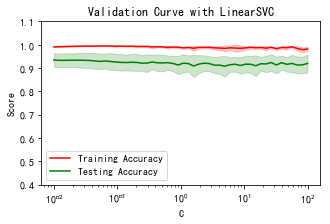

In [2]:
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(5, 3))
# 主线
plt.semilogx(param_range, train_scores_mean, 
             label="Training Accuracy", color="r")
# 阴影区域
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, 
                 color="r")

plt.semilogx(param_range, test_scores_mean, 
             label="Testing Accuracy", color="g")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.2, 
                 color="g")

plt.title("Validation Curve with LinearSVC")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.4, 1.1)
plt.legend(loc='best')
plt.show()